In [67]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as sst

In [68]:
a = [-0.3, 0.5]
def f(x, a):
    return np.inner(a, [1,x])
def y(x, w):
    return w[0] + w[1]*x

noise_sd = 0.2
beta = (1/noise_sd)**2
rv_noise = sst.norm(loc=0, scale=noise_sd)
rv_x = sst.uniform(loc=-1, scale=2)

In [69]:
a = [-0.3, 0.5]

def f(x, a):
    return a[0] + a[1]*x

def y(x, w):
    return w[0] + w[1]*x

noise_sd = 0.2
beta = (1/noise_sd)**2
rv_noise = sst.norm(loc=0, scale=noise_sd)
rv_x = sst.uniform(loc=-1, scale=2)
n_data = 100
x = rv_x.rvs(n_data)
no_noise = pd.Series(x).apply(lambda x: f(x, a))
t = no_noise + rv_noise.rvs(n_data)

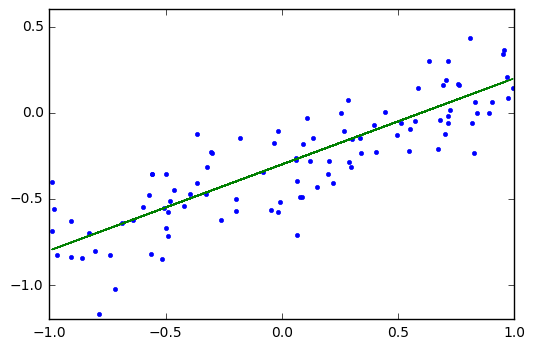

In [70]:
plt.plot(x, t, '.')
plt.plot(x, no_noise)

In [71]:
def plot_contour(rv_w):
    plt.figure(figsize=(3,3)); 
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    plt.contourf(x, y, rv_w.pdf(pos))

In [72]:
def plot_data_space(rv_w):
    plt.figure(figsize=(3,3)); 
    plt.ylim([-1,1])
    for i in range(10):
        w=rv_w.rvs()
        x=np.linspace(-1,1,100)
        t=pd.Series(x).apply(lambda x: f(x, w))
        plt.plot(x, t)

In [73]:
m0=np.array([0,0])
s0=np.eye(2)
rv_w = sst.multivariate_normal(m0, s0)
rv_w.pdf([0,0])

0.15915494309189535

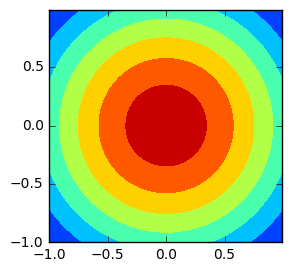

In [74]:
plot_contour(rv_w)

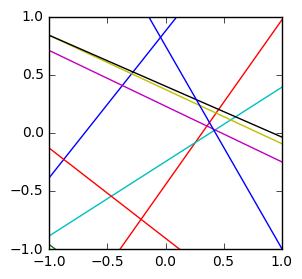

In [75]:
plot_data_space(rv_w)

In [76]:
i = 0

In [77]:
w_grid = np.mgrid[-1:1:.01, -1:1:.01]

In [78]:
likelihood = sst.norm(loc=f(x[i], w), scale=noise_sd).pdf(t[i]).prod()

In [79]:
def likelihood(w, t, x):
    return sst.norm(loc=f(x, w), scale=noise_sd).pdf(t).prod()

In [80]:
array_likehood=np.zeros([10,10])
for j, w_0 in enumerate(np.linspace(-1,1,10)):
    for k, w_1 in enumerate(np.linspace(-1,1,10)):
        likelihood = sst.norm(loc=f(x[i], [w_0, w_1]), scale=noise_sd).pdf(t[i]).prod()
        array_likehood[j,k]=likelihood

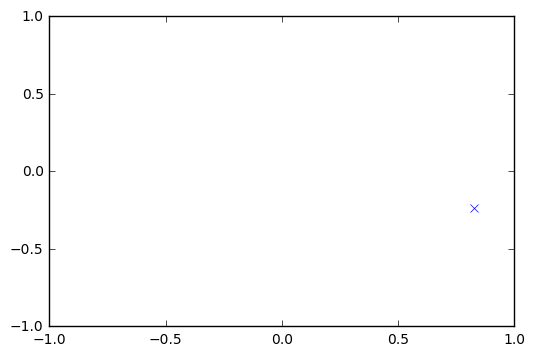

In [86]:
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.plot(x[i], t[i], 'x')

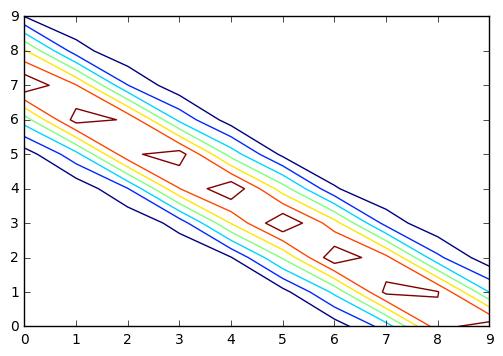

In [82]:
plt.contour(array_likehood)